<a href="https://colab.research.google.com/github/ThanhVanLe0605/Data-Mining-For-Business-Analytics-In-Python/blob/main/Chapter_06_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$CHAPTER$ $ $ $6:$ $MULTIPLE$ $ $ $LINEAR$ $ $ $REGRESSION$

This chapter introduces linear regression models with a specific focus on predictive analytics. Key topicscovered include:

* **Linear Regression Models**

Introduction to regression models designed for **prediction**

Distinguish between model fitting for **inference**(classical statistics) and fitting for **prediction**

* **Model Evaluation Methodology**

The necessity of evaluating model performance on a **validation set**

The use of specific **predictive metrics**(e.g, RMSE, MAE) rather than goodness-of-fit statistics  alone ( like $R^{2}$ )

* **Variable Selection**

Addressing the challenges associated with using a large number of **predictors** (features).

Implementation of **Variable Selection Algorithms** to identify the most relevant features for the model.

# TABLE OF CONTENTS

6.1. [INTRODUCTION](https://colab.research.google.com/drive/1x2NpXouzqo869hcjUJJ9aW59Fqbhr78k#scrollTo=IB8Z828xSRLb&line=1&uniqifier=1)

6.2. [EXPLANATORY VS. PREDICTIVE MODELING](https://colab.research.google.com/drive/1x2NpXouzqo869hcjUJJ9aW59Fqbhr78k#scrollTo=XBNBFMp6SWuR&line=1&uniqifier=1)

6.3. [ESTIMATING THE REGRESSION EQUATION AND PREDICTION](https://colab.research.google.com/drive/1x2NpXouzqo869hcjUJJ9aW59Fqbhr78k#scrollTo=p143lu77Sco2&line=1&uniqifier=1)

6.4. [VARIABLE SELECTION IN LINEAR REGRESSION](https://colab.research.google.com/drive/1x2NpXouzqo869hcjUJJ9aW59Fqbhr78k#scrollTo=7VFkjt6tTfQ-&line=1&uniqifier=1)

6.5. [APPENDIX: USING STATMODELS](https://colab.research.google.com/drive/1x2NpXouzqo869hcjUJJ9aW59Fqbhr78k#scrollTo=Hugi2j4RU6Na&line=1&uniqifier=1)

**Python**

In this chapter, we will use **pandas** for data handling, and **scikit-learn** for building the models, and variable (feature) selection. We will also make use of the utility functions from the Python Utilities Functions Appendix. We could use **statmodels** for the linear regression model, however, **statmodels** provides more information than needed for predictive modeling. Use the following import statements for the Python code in this chapter.


In [ ]:
!pip install dmba

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.2 MB/s eta 0:00:00
Colab environment detected.


# 6.1. INTRODUCTION

#### **6.1.1. Model Definition & Terminology**
* The **multiple linear regression model** is the most popular model for making predictions. It fits a relationship between a numerical outcome and a set of predictors.

* **Outcome  variable ($Y$):** Also called the response, target, or dependent variable.

* **Predictors ($X_1, \dots, X_p$):** Also called independent variables, input variables, regressors, or covariates.

#### **6.1.2. The Model Equation**
The model assumes the relationship is approximated by the function:

$$Y= \beta_0 +\beta_1x_1 +\beta_2x_2 +\dots +\beta_px_p +\epsilon$$

* $\beta_0, \dots, \beta_p$: **Coefficients** estimated from the data.

* $\epsilon$: **Noise** (unexplained part)
#### **6.1.3. Feature Engineering (Input Forms)**
Regression modeling involves not only estimating coefficients but also selecting **which predictors** to include and in **what form**.

* **Forms:** Predictors can be included 'as is', in logarithmic form [$\log(X)$], or in binned form (e.g., are groups)
* **Selection Criteria:** Choices depend on **domain knowledge**, data availability, and needed predictive power.


#### **6.1.4. Applications**

Common predictive modeling situations include:
* Predicting credit card activity based on demographics and historical patterns.
* Predicting vacation travel expenditures based on frequent flyer data.
* Predicting help desk staffing requirements based on sales information.
* Predicting sales from cross-selling products.
* Predicting the impact of discounts on retail sales.

# 6.2. EXPLANATORY VS. PREDICTIVE MODELING

Before using linear regression for prediction, it is crucial to distinguish between two popular but different objectives.

## 6.2.1. The Distinction



1.   **Explanatory Task :** Explaining or quantifying the average effect of inputs on an outcome (explanatory or descriptive task, respectively)
2.   **Predictive Task :** Predicting the outcome value for new records, given their input values



## 6.2.2. The Classical Statistical Approach (Explanatory)

* **Focus :** Objective #1 (explaning)
* **Data view :** Data is treated as a random sample from a larger population. The model attempts to capture the **average relationship** in that population.
* **Interpretation :** Used to generate statements like **"A unit increase in service speed ($X_1$) is associated with an average increase of 5 points in Satisfaction ($Y$), all other factors ($X_2$, $X_3$, ... , $X_p$) being equal. "**
* **Explanatory modeling:** If causal structure is known ($X$ causes $Y$), used for actionable policy changes.
* **Descriptive Modeling:** If causal structure is unknown, it quantifies the degree of **association**.

## 6.2.3. The Predictive Analytics Approach (Data Mining)

* **Focus:** Object #2 (predicting).
* **Target:** Predicting **new individual records**
* **Mindset:** We are not interested in the coefficients themselves or the **average record**, but rather in the **predictions ($\hat{y}$)** the model generates.
* **Usage:** Used for **micro-decision-making** at the record level (e.g., predicting satisfaction for *each* new customer).

## 6.2.4. Modeling Process & Trade-off

* **Optmization:**
  * *Explanatory:* Tries to fit the **best model to the existing data** to learn underlying relationships.
  * *Predictive:* Tries to find a model that best predicts **new individual records**.
* **The Overfitting Paradox:** A regression model that fits the existing data **too well** is not likely to perform well with new data.
* **Solution:** We look for the model with the highest predictive power by evaluating it on a **holdout set** (validation set) using predictive metrics.

## 6.2.5. Summary of Key Differences

There are four main differences in using linear regression for these two scenarios:

1. **Definition of "Good":**
   * *Explanatory :* A good model fits the data closely.
   * *Predictive :* A good model predicts new records accurately. (Input variable selection may differ).

2. **Data Usage:**
   * *Explanatory :* The **entire dataset** is used to estimate the best-fit model (maximizing information).
   * *Predictive :* Data is split into a **Training Set** (to estimate the model) and a **Validation/ Holdout Set** (to assess predictive performance on unobserved data).

3. **Performance Measures:**
   * *Explanatory:* Measures how well the model approximates the data (**Goodness-of-fi**) and the strength of average relationship.
   * *Predictive:* Measured by **predictive accuracy**

4. **Focus:**
   * *Explanatory:* Focus is on the **coefficients ($\beta$)**.
   * *Predictive:* Focus is on the **predictions ($\hat{y}$)**.

For these reasons, it is extremely important to know the goal of the analysis before beginning the modeling process. A good predictive model can have a looser fit to the data on which it is based, and a good explanatory model can have low prediction accuracy. In the remainder of this chapter,we focus on predictive models because these are more popular in data mining and because most statistics textbooks focus on explanatory modeling.

# 6.3. ESTIMATING THE REGRESSION EQUATION AND PREDICTION

## 6.3.1. Estimation method: Ordinary Least Squares (OLS)

One predictors and their forms are selected, the coefficients are estimated from the data using a method called **Ordinary Least Squares (OLS)**.

* **Objective:** Find values $\hat{\beta_0}, \hat{\beta_1}, \dots, \hat{\beta_p}$ that **minimize the sum of squared deviations** between the actual outcome values ($Y$) and their predicted values ($\hat{Y}$).

* **Prediction Equation:** To predict the value for a new record, we use the equation:

    $$\hat{Y} = \hat{\beta_0} + \hat{\beta_1} + \dots + \hat{\beta_p}$$



## 6.3.2. Statistical assumptions

For OLS estimates to be the **best** (unbiased and having the smallest mean squared error), the following assumptions are typically made:

1. The noise $\epsilon$ (or equivalently, $Y$) follows a **normal distribution**

2. The choice of predictors and their form is correct (*linearity*)

3. The records are independent of each other.

4. The variability in the outcome values for a given set of predictors is the same regardless of the values of the predictors (*homoskedasticity*)

## 6.3.3. Data mining perspective: Prediction vs. Assumptions

* **Key insight:** For the goal of **prediction**, satisfying the strict statistical assumptions (like the normal distribution of noise) is often of **secondary interest**.

* **Focus:**: Even if assumptions are violated, predictions can still be sufficiently accurate. The priority is to evaluate the model's **predictive performance** on a validation set rather than just checking assumptions.

## 6.3.4. EXAMPLE : PREDICTING THE PRICE OF USED TOYATA COROLLA CARS

* **Goal:** Predict the price of used cars to ensure dealership profitability.
* **Data Partitioning:** The dataset (1000 records) is partitioned into a **Training Set (60%)** for fitting the model and a **Validation Set (40%)** for evaluating performance.
* **Handling Categorical Predictors (Dummy Variables):**
    * Categorical variables like `Fuel Type` (Petrol, Diesel, CNG) must be converted into **dummy variables** (0/1).
    * **The $N-1$ Rule:** If a variable has $N$ categories, we create **$N-1$ dummy variables**.
    * *Example:* For `Fuel Type` (3 categories), we create `Fuel_Type_Petrol` and `Fuel_Type_Diesel`. The third category (`CNG`) is redundant. Including it would cause the regression to fail due to perfect linear combination.


**TABLE 6.1. VARIABLES IN THE TOYOTA COROLLA EXAMPLE**

In [ ]:
tb = pd.read_csv("Table_6.1.csv")
tb


,Variable,Description
0,Price,Offer price in Euros
1,Age,Age in months as of August 2004
2,Kilometers,Accumulated kilimeters on odometer
3,Fuel type,Fuel type(Petrol or Diesel or CNG)
4,HP,Horsepower
5,Metalic,Metalic color?(Yes = 1 or No = 0)
6,Automatic,Automatic(Yes =1 or No =0)
7,CC,Cylinder volume in cubic centimeters
8,Doors,Numer of doors
9,QuarTax,Quarterly road tax in Euros


**TABLE 6.2. PRICES AND ATTRIBUTES FOR USED TOYOTA COROLLA CARS (SELECTED ROWS AND COLUMNS ONLY)**

In [ ]:
car_df = pd.read_csv('ToyotaCorolla.csv')

car_df_needed = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']
car_df = car_df[[c for c in car_df_needed if c in car_df.columns]]
car_df = car_df.rename(columns= {'cc':'CC'})
car_df


,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,69,1015


## **Predictive Measures of Error**

In predictive modeling, we typically do not use $R^2$ to assess performance on the validation set. Instead, we use measures based on the **prediction error** ($e_i = y_i - \hat{y}_i$).

### **1. Key Error Metrics**

| Metric | Name | Formula | Key Characteristics & Usage |
| :--- | :--- | :--- | :--- |
| **ME** | **Mean Error** | $$\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$$ | • **Purpose:** Measures **Bias**. Tells if the model is over-forecasting or under-forecasting.<br>• **Interpretation:**<br>  - $ME > 0$: Under-forecast (Actual > Predicted).<br>  - $ME < 0$: Over-forecast (Actual < Predicted).<br>• **Note:** $ME \approx 0$ does not mean the model is good (positive and negative errors cancel out). |
| **MAE** | **Mean Absolute Error** | $$\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$ | • **Meaning:** On average, how many units is the prediction off by?<br>• **Usage:** Good for reporting to management (easy to explain). Use when the cost of error increases **linearly**.<br>• **Pros/Cons:** Robust to outliers (does not penalize large errors heavily). |
| **RMSE** | **Root Mean Squared Error** | $$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$ | • **Meaning:** Standard deviation of the prediction errors.<br>• **Usage:** Use when you want to heavily penalize **large errors** (outliers).<br>• **Pros/Cons:** Very sensitive to outliers. A few bad predictions can inflate RMSE significantly. |
| **MAPE** | **Mean Absolute Percentage Error** | $$\frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|$$ | • **Meaning:** Average error in percentage terms.<br>• **Usage:** Useful for comparing performance across products/channels with **different scales**.<br>• **Note:** Undefined if Actual ($y$) = 0. Can "explode" if values are very small. |
| **MPE** | **Mean Percentage Error** | $$\frac{100\%}{n}\sum_{i=1}^{n}\left(\frac{y_i - \hat{y}_i}{y_i}\right)$$ | • **Purpose:** Measures **Percentage Bias**.<br>• **Interpretation:** Similar to ME but in percentage.<br>  - $MPE > 0$: Under-forecast in %.<br>  - $MPE < 0$: Over-forecast in %. |

---

### **2. Strategic Metric Interpretation**
How to read these metrics to make decisions?

**Step 1: Check for Bias (ME & MPE)**
* If $ME \approx 0$ and $MPE \approx 0 \rightarrow$ The model is **unbiased** (predictions are centered around actuals).
* If $ME > 0 \rightarrow$ The model tends to **under-forecast**.
* If $ME < 0 \rightarrow$ The model tends to **over-forecast**.
* *Action:* Use this to adjust the intercept or scaling if necessary.

**Step 2: Detect Large Errors (RMSE vs. MAE)**
* If $RMSE \approx MAE \rightarrow$ Errors are distributed evenly. The model is **stable**.
* If $RMSE \gg MAE$ (significantly larger) \rightarrow **Warning!** There are **large outliers** (big mistakes) in the predictions.
* *Insight:* Tells you if there are specific "disaster" points causing high error.

**Step 3: Assess Relative Accuracy (MAPE)**
* $MAPE < 10\% \rightarrow$ Excellent.
* $10\% - 20\% \rightarrow$ Acceptable.
* $> 40\% \rightarrow$ Problematic.
* *Insight:* Helps determine if the error level is acceptable for the business scale.

In [ ]:
# code for fitting a regression model

# reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = car_df.iloc[0:1000]

predictors = ['Age_08_04', 'KM', 'Fuel_Type',  'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first= True )
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size= 0.4, random_state =1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_ } ))


           Predictor  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543



After running the algorithm on the dataset, we obtainted the regression coefficients. The prediction equation for car price ('Price') is formulated as follows:

$$
\begin{aligned}
\widehat{Price} =&-140.75(Age) - 0.018(KM) + 36.10(HP) + 84.28(Met\_Color)\\
& + 416.78(Automatic) + 0.018(CC) - 50.66(Doors) + 13.63(Tax) \\
& + 13.04(Weight) + 1066.46(Diesel) + 2310.25(Petrol)
\end{aligned}
$$


**TABLE 6.3. LINEAR REGRESSION MODEL OF PRICE VS. CAR ATTRIBUTES**

In [ ]:
# Use predict() to make predictiions on a train set
car_lm_pred = car_lm.predict(train_X)

print('\n')
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': train_y, "Residual": train_y - car_lm_pred})
print(result.head(20))

# print performance measures (training data)
regressionSummary(train_y,  car_lm.predict(train_X))



        Predicted  Actual     Residual
371  14749.081378   13995  -754.081378
45   17790.301531   19000  1209.698469
560  11121.976920   10950  -171.976920
748   9338.952080    8950  -388.952080
419   8805.266673    8950   144.733327
604   6074.147930    7900  1825.852070
725   7510.189551    8150   639.810449
11   20741.629982   19950  -791.629982
214  15042.646405   13500 -1542.646405
344  14839.422202   12950 -1889.422202
700   8710.273398    7999  -711.273398
720   9397.613046    8450  -947.613046
147  18527.217123   24500  5972.782877
299  13634.145578   13750   115.854422
283  14360.894045   13950  -410.894045
745   7351.873412    8450  1098.126588
412  10981.699996    8950 -2031.699996
629   8700.514958    7750  -950.514958
795   9857.384342    8950  -907.384342
741   9770.516208   10450   679.483792

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
        


**Training Set Evaluation(Run 1)**

**Purpose:** "Internal Health Check"- To verify if the model has successfully learned patterns from the data.

**Applying Strategic Metric Interpretation:**

* **Step 1:Check for Bias (ME)**
  * $ME = 0.0000$
  * **Conclusion:** The model is **Unbiased**. On the data it learned from, the average of predictions perfectly matches the actuals.

* **Step 2: Detect Large Errors(RMSE vs. MAE)**
  * Comparing $RMSE (1400.58)$ and $MAE(1046.90)$. The RMSE is approximately 33% higher than MAE.
  * **Warning:** There is the presence of outliers causing the error metrix to be heavily penalized.
  * **Evidence:** Looking at the sample data table, the row **Index 147** has a residual of **5972**. It is these "extreme" points that have pulled the RMSE up.

* **Step 3: Assess Relative Accuracy (MAPE)**

* &MAPE = 9.30\%&
* **Conclusion:** Below 10% is considered **Excellent**. The model has learned the general rules very well.

**TABLE 6.4. PREDICTED PRICES (AND ERRORS) FOR 20 CARS IN VALIDATION SET AND SUMMARY PREDICTIVE MEASURES FOR ENTIRE VALIDATION SET (CALLED TEST SET IN R)**

In [ ]:
# code for fitting a regression model to training set and predicting prices in validation set

# Use predict() to make predictiions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y, "Residual": valid_y - car_lm_pred})
print(result.head(20))

# Print performance measures (validation data)
regressionSummary(valid_y, car_lm_pred)

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
        

**Validation set Evaluation(Run 2)**

**Purpose:** Real-world performance commitment - Assessing predictive ability on unseen cars.

* **Applying Strategic Metric Interpretation:**

* **Step 1: Check for Bias (ME)**
  * $ME = 103.68$ (Positive)
  * **Conclusion:** There is a slight tendency to **Under-forecast**. On average, the model is pricing cars about $104 lower than reality.

* **Step 2: Detect Large Errors (RMSE vs. MAE)**
  * $RMSE(1312$ is still larger than &MAE(1017)&, but the gap has narrowed compared to the training set.
  * **Evidence:** The largest errors (such as **Index 49: 2743**, **Inde 600: -2489**) are better controlled compared to the error of 5972 found in the training set.

* **Step 3: Assess Relative Accuracy (MAPE)**

* $MAPE = 9.01\%$
* **Conclusion:** It remains at an **Excellent** level,

**Comparison & Conclusion (The Critical Decision )**

**Question:** Which metrics to use for what?

* **Training Stats:** Used for **Health check** (Model Diagnostics).
  * If errors here are high $\rightarrow$ Bad model (Underfitting)
  * If errors are extremely low but validation errors are high $\rightarrow$ Rote Learning (Overfitting).

* **Validation Stats**
  * Used for **Predictive Reporting**. This is the number you use to answer the client's question. "How much does this model deviate?"

**Reality Comparison:**
* Training RMSE: $1400.5823$
* Validation RMSE: $1312.8523$
* **Insight:** This is quite interesting and positive. Typically, validation errors are higher. However, here the validation error is lower. This proves the model is **Robust**, not overfitting, and implies the training set contained some noise (like the Inde 147 case) that the validation set did not.

**$\rightarrow$ FINAL CONCLUSION:** Should we use this model to predict car prices? **YES.** The model achieves excellent accuracy ($MAPE \approx 9\%$) and demonstrates high stability on new data.

**FIGURE 6.1. HISTOGRAM OF MODEL ERRORS (BASED ON VALIDATION SET)**

0.7425


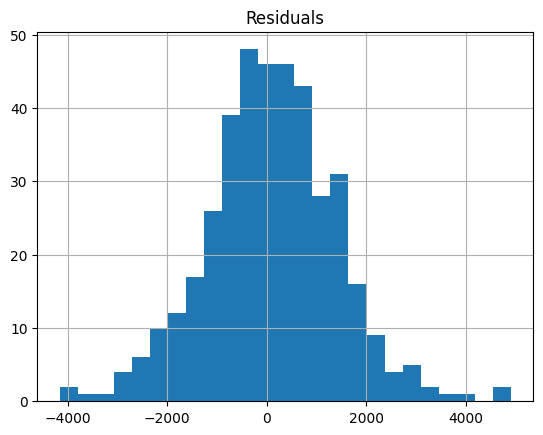

<Figure size 400x600 with 0 Axes>

In [ ]:
# code for plotting histogram of validation errors

car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y  - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx
# 75%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406) ]) / len(all_residuals))

pd.DataFrame({"Residuals": all_residuals}).hist(bins = 25)
plt.figure(figsize=(4, 6))
plt.show()

**Question:** How to choose the "optimal range" for plotting?

Looking at the `Residual` column in the validation set:
* Most small errors cluster around 0 (e.g., 892, -322, 832).
* The largest errors are around $\pm 2500$ (e.g., 2743, -2489).


**Binning Strategy:**
1.  **Center:** Must always be **0**. The Peak of the bell curve must be located here.
2.  **Range:** Choose a range that captures 95% of the data.
    * Based on the data table, most cars deviate within the range of **$\pm 2000$**.
    * Therefore, we should set the X-axis from **-2000 to +2000**.
    * Points falling outside this range (like car **Index 49**) will be considered **Outliers** in the tails of the chart. This helps the histogram focus on the "majority" and clearly display the Normal Distribution shape (Bell curve).


# 6.4. VARIABLE SELECTION IN LINEAR REGRESSION

A frequent problem in data mining is using a regression equation to predict the value of a dependent variable when there are too many variables available to choose as predictors.

Given the high processing speeds of modern algorithms for multiple regression calculations, analysts are often tempted by the **"kitchen-sink approach"**: Why bother selecting a subset? Just throw all variables into the model. However, there are several reasons to exercise caution before including every possible variable in a model:

1.  **Cost and Feasibility:** It might be expensive or unfeasible to collect the full set of predictors for future predictions.
2.  **Accuracy:** We might be able to measure fewer predictors more accurately (e.g., in surveys).
3.  **Missing Values:** The more predictors used, the higher the chance of missing data. If we delete or impute missing records, having many predictors leads to a higher rate of record deletion/imputation.
4.  **Parsimony:** This is a crucial property of good models. We gain more insight into the influence of predictors in models with fewer parameters.
5.  **Multicollinearity:** Regression coefficient estimates are likely to be unstable due to multicollinearity (the presence of two or more predictors sharing the same linear relationship). A rough rule of thumb is that the number of records $n$ should be greater than $5(p + 2)$, where $p$ is the number of predictors.
6.  **Bias-Variance Trade-off:**
    * Using predictors that are uncorrelated with the outcome variable will **increase the variance** of predictions.
    * Dropping predictors that are actually correlated with the outcome variable can **increase the average error (bias)** of predictions.

This trade-off is particularly important when dealing with a large number of predictors. Removing "noise" variables (those with small coefficients relative to standard deviation and correlated with others) improves prediction because it reduces prediction variance. Therefore, methods to reduce the number of predictors $p$ to a smaller subset are frequently used.



## REDUCING THE NUMBER OF PREDICTORS

## HOW TO REDUCE THE NUMBER OF PREDICTORS

**Step 1: Use Domain Knowledge**
The first step is always to leverage domain expertise. It is essential to understand what the predictors are measuring and why they are related to the outcome variable. Practical reasons to remove a predictor include high collection costs, inaccuracy, high correlation with another predictor, or excessive missing values. Useful tools include frequency tables, correlation matrices, and summary plots.

**Step 2: Use Computational Methods**
There are two general types of algorithmic methods for variable reduction:
1.  **Exhaustive Search:** Finding the "best" subset by fitting regression models with all possible combinations of predictors.
2.  **Partial Search (Iterative):** Searching through a partial set of models (e.g., Stepwise Regression).


### Method 1: Exhaustive Search

The idea here is to evaluate all subsets of predictors. To select a model that is neither too simple (under-fit) nor too complex (over-fit), we use the following evaluation criteria:

**1. Adjusted $R^2$ ($R^2_{adj}$)**
Defined as:
$$R^2_{adj} = 1 - \frac{n - 1}{n - p - 1} (1 - R^2)$$
* Where $R^2$ is the proportion of variation explained by the model.
* Unlike standard $R^2$, $R^2_{adj}$ imposes a **penalty** on the number of predictors used. This prevents the artificial inflation of $R^2$ that occurs when simply adding non-informative variables.
* Selecting the subset with the highest $R^2_{adj}$ is equivalent to selecting the subset that minimizes the RMSE on the training set.

**2. Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)**
These metrics measure goodness of fit but include a heavier penalty for model complexity (number of parameters):

$$AIC = n \ln(SSE/n) + n(1 + \ln(2\pi)) + 2(p + 1)$$

$$BIC = n \ln(SSE/n) + n(1 + \ln(2\pi)) + \ln(n)(p + 1)$$

* Where $SSE$ is the Sum of Squared Errors.
* Generally, models with **lower** AIC and BIC values are considered better.

*Note:* For models with the same number of predictors, $R^2_{adj}$, AIC, and BIC will all select the exact same subset. They only differ when comparing models with different numbers of predictors.


**TABLE 6.5. EXHAUSTIVE SEARCH FOR REDUCING PREDIICTORS IN TOYOTA COROLLA EXAMPLE**

In [ ]:
#code exhaustive, adjusted_r2_score, AIC_score

# exhaustive search
import itertools

def exhausted_search(variables, train_model, score_model):
  """Variable selection using backward elimination

  Input:
    variables: complete list of variables to consider in model building
    train_model: function that returns a fitted model for a given set of variables
    score_model: function that returns the score of a model; better models have lower scores

  Returns:
    List of best subset models for increasing number of variables
  """

  # create models of increasing size and determine the best models in each case
  result = []
  for nvariables in range (1, len(variables)+ 1):
    best_subset = None
    best_score = None
    best_model = None
    for subset in itertools.combinations(variables, nvariables):
        subset = list(subset)
        subset_model = train_model(subset)
        subset_score = score_model(subset_model, subset)
        if best_subset is None or best_score > subset_score:
              best_subset = subset
              best_score = subset_score
              best_model = subset_model
    result.append({
        'n' : nvariables,
        'variables': best_subset,
        'score': best_score,
        'model': best_model,
    })

  return result

# adjusted_r2_score
from sklearn.metrics import r2_score
def adjusted_r2_score(y_true, y_pred, model):
  """calculate adjusted R2
  Input:
      y_true : actual value
      y_pred: predicted value
      model: predictive model
   """
  n = len(y_pred)
  p = len(model.coef_)
  r2 = r2_score(y_true, y_pred)
  return 1 - (1 -r2) * (n-1)/ (n - p - 1)

# AIC_score
import math
import numpy as np
def AIC_score(y_true, y_pred, model = None, df = None):
  """
  Input:
        y_true: actual values
        y_pred: predicted values
        model (optional): predictive model
        df (optional): degrees of freedom of model

  One of model or df is required
  """

  if df is None and model is None:
    raise ValueError('You need to provide either model or df')
  n = len(y_pred)
  p = len(model.coef_) + 1 if df is None else df
  resid = np.array(y_true) - np.array(y_pred)
  sse = np.sum(resid ** 2)
  constant = n + n * np.log(2*np.pi)
  return n*math.log(sse/n) + constant + 2 * (p + 1)

# code for 6.5
def train_model(variables):
  model = LinearRegression()
  model.fit(train_X[list(variables)], train_y)
  return model

def score_model(model, variables):
  pred_y = model.predict(train_X[list(variables)])
  # we negate as score is optimized to be as low as possible
  return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhausted_search(allVariables, train_model, score_model)

data = []
for result in results:
  model = result['model']
  variables = list(result['variables'])
  AIC = AIC_score(train_y, model.predict(train_X[variables]),  model)

  d = {'n' : result['n'], 'r2adj': -result['score'], 'AIC': AIC}
  d.update({var: var in result['variables'] for var in allVariables})
  data.append(d)

# Construct the list of all column names correctly
alldf_columns = list(('n', 'r2adj', 'AIC')) + list(allVariables)
pd.DataFrame(data, columns = alldf_columns)

,n,r2adj,AIC,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,0.767901,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,True,False,True,False,False,False,False,False,False,False,False
2,3,0.829659,10506.084235,True,False,True,False,False,False,False,False,True,False,False
3,4,0.846357,10445.174820,True,True,True,False,False,False,False,False,True,False,False
4,5,0.849044,10435.578836,True,True,True,False,False,False,False,True,True,False,False
5,6,0.853172,10419.932278,True,True,True,False,False,False,False,True,True,False,True
6,7,0.853860,10418.104025,True,True,True,False,False,False,False,True,True,True,True
7,8,0.854297,10417.290103,True,True,True,False,True,False,False,True,True,True,True
8,9,0.854172,10418.789079,True,True,True,False,True,False,True,True,True,True,True
9,10,0.854036,10420.330800,True,True,True,True,True,False,True,True,True,True,True


### Method 2: Popular Subset Selection Algorithms (Iterative Search)

When the number of predictors is large, an exhaustive search is computationally infeasible. In such cases, we use iterative search methods:

**1. Forward Selection:**
* Start with no predictors (null model). Add predictors one by one.
* At each step, add the predictor that makes the largest contribution to $R^2$.
* Stop when the contribution of additional predictors is not statistically significant.
* *Downside:* It may miss pairs or groups of predictors that work very well together but perform poorly as single predictors.

**2. Backward Elimination:**
* Start with all predictors (full model).
* At each step, remove the least useful predictor (the one with the least statistical significance).
* Stop when all remaining predictors contribute significantly.

**3. Stepwise Regression:**
* A flexible combination of both methods: at each step, the algorithm considers adding a new variable or removing an existing one, depending on how the evaluation criteria change.


**TABLE 6.6. BACKWARD ELIMINATION FOR REDUCING PREDICTORS IN TOYOTA COROLLA EXAMPLE**

In [ ]:
# backward_elimination



**TABLE 6.7. FORWARD SELECTION FOR REDUCING PREDICTORS IN TOYOTA COROLLA EXAMPLE**

In [ ]:
# forward elimination



**TABLE 6.8 STEPWISE REGRESSION FOR REDUCING PREDICTORS IN TOYOTA COROLLA EXAMPLE**

**REGULARIZATION (SHRINKAGE MODELS)**

### 1. Concept: Why Regularization?
* **The Problem:** In standard Linear Regression, if predictors are highly correlated (**multicollinearity**), the estimates of coefficients become unstable. They exhibit high **standard errors** (high variance), meaning small changes in training data can lead to drastically different models.
* **The Solution (Shrinkage):** Instead of just selecting a subset of variables (setting coefficients to 0), **Regularization** shrinks the coefficients *towards* 0.
* **The Trade-off:** By constraining the total magnitude of coefficients, we accept a slight increase in **Bias** to achieve a significant reduction in **Variance**, leading to better prediction performance on new data.

### 2. Key Methods: Ridge vs. Lasso

#### a. Ridge Regression (L2 Penalty)
* **Mechanism:** Adds a penalty term based on the **sum of squared coefficients** ($\sum \beta^2$).
* **Effect:** Shrinks coefficients towards zero but rarely makes them exactly zero.
* **Use Case:** Good when you want to keep all variables but reduce their impact/instability.

#### b. Lasso Regression (L1 Penalty)
* **Mechanism:** Adds a penalty term based on the **sum of absolute values of coefficients** ($\sum |\beta|$).
* **Effect:** Can shrink coefficients **exactly to zero**.
* **Use Case:** Functions as both a regression model and a **Feature Selection** tool (it automatically discards irrelevant variables).


### 3. Python Implementation (Scikit-learn)

Implementation is done via `sklearn.linear_model`.

* **Classes:** Use `Ridge` and `Lasso`.
* **The Alpha Parameter ($\alpha$):**
    * Controls the strength of the penalty.
    * `alpha = 0`: Equivalent to standard Linear Regression (OLS).
    * Higher `alpha`: Stronger regularization (coefficients shrink more).
* **Automatic Parameter Selection (Auto-tuning):**
    * `RidgeCV` and `LassoCV`: Use **Cross-Validation** to find the optimal $\alpha$.
    * `BayesianRidge`: Uses an iterative probability-based approach to infer parameters from the data.
* **Crucial Pre-processing Step:**
    * **Standardization is mandatory.** Since penalties are based on the magnitude of coefficients, all predictors must be on the same scale. Use `StandardScaler` or ensure `normalize=True`.

### 4. Alternative Implementation (Statsmodels)

While `scikit-learn` is optimized for prediction, `statsmodels` is better for **statistical inference** (p-values, confidence intervals).

* **Method:** Use `sm.OLS`.
* **Function:** `OLS.fit_regularized`.
* **Parameters:**
    * `L1_wt = 0`: Ridge Regression.
    * `L1_wt = 1`: Lasso Regression.
    * `0 < L1_wt < 1`: Elastic Net (combination of both).


**TABLE 6.9. LASSO AND RIDGE REGRESSION APPLIED TO THE TOYOTA COROLLA DATA**

**TABLE 6.10. LINEAR REGRESSION MODEL OF PRICE VS. CAR ATTRIBUTES USING STATSMODELS (COMPARE WITH TABLE 6.3)**

# APPENDIX: USING STATMODELS

While `scikit-learn` is optimized for prediction, `statsmodels` is better for **statistical inference** (p-values, confidence intervals).

* **Method:** Use `sm.OLS`.
* **Function:** `OLS.fit_regularized`.
* **Parameters:**
    * `L1_wt = 0`: Ridge Regression.
    * `L1_wt = 1`: Lasso Regression.
    * `0 < L1_wt < 1`: Elastic Net (combination of both).


> **Parsimony Principle:** If a regularized model (like Lasso) selects fewer variables but performs similarly to a complex model, prefer the simpler one. Simple models are easier to interpret and maintain.

> **Data Context:** Regularization shines when you have **many variables** with **high correlation**. In datasets with few, uncorrelated variables (like the specific Toyota Corolla example), standard OLS might perform just as well or better because the bias introduced by regularization outweighs the variance reduction.


**References:**

* [Kitchen Sink Model](https://www.vexpower.com/brief/kitchen-sink-model#:~:text=In%20data%20science%2C%20a%20kitchen,everything%20but%20the%20kitchen%20sink.)

* [Sparsity and Parsimonious Models: Everything should be made as simple as possible, but no simpler](https://www.youtube.com/watch?v=9eGMJ3-wmm0&embeds_referring_euri=https%3A%2F%2Fwww.google.com%2Fsearch%3Fq%3Dwhat%2Bis%2Bparsimony%2Bin%2Bmodelling%26sca_esv%3D433c76685208b106%26udm%3D7%26biw%3D711%26bih%3D633%26sxsrf%3DAE3TifPmXzKQ&source_ve_path=MTY0OTksMjM4NTE)

* [Rules of Thumb in Data Engineering](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/ms_tr_99_100_rules_of_thumb_in_data_engineering.pdf)

* [Machine Learning Fundamentals: Bias and Variance](https://www.youtube.com/watch?v=EuBBz3bI-aA)

* [Statistics 101: Multiple Regression, Forward Selection](https://www.youtube.com/watch?v=0UJcGPR2W5U)

* [Statistics 101: Multiple Regression, Backward Elimination](https://www.youtube.com/watch?v=pv4SBxyynxc)

* [Statistics 101: Multiple Regression, Stepwise Regression](https://www.youtube.com/watch?v=An40g_j1dHA)

* [Shrinkage methods](https://web.stanford.edu/class/stats202/notes/Model-selection/Shrinkage.html)

$NOTES:$

# 📘 MODEL BUILDING TECHNIQUES

To build an effective linear regression model, a Data Scientist must balance minimizing error with optimizing model complexity. Below is a systematic summary ranging from core metrics to execution processes.

---

## PART 1: MATHEMATICAL FOUNDATIONS & DECISION METRICS

Understanding these formulas is key to grasping the "rules of the game" regarding adding or removing variables in a model.

### 1. Squared Semi-partial Correlation
$$sr_i^2 = R^2_{model\_with\_Xi} - R^2_{model\_without\_Xi}$$
* **Interpretation:** **Unique Incremental Value.** Measures the amount of variance in $Y$ that variable $X_i$ explains *independently*, after removing the overlap with other variables. This is the gold standard for selecting variables in Stepwise/Forward techniques.

### 2. SSE (Sum of Squares Error)
$$SSE = \sum (y - \hat{y})^2$$
* **Interpretation:** **Ultimate Goal.** The total sum of squared errors. All algorithms aim to minimize SSE. A lower SSE means the model fits the data better.

### 3. SST (Total Sum of Squares)
$$SST = \sum (y - \bar{y})^2$$
* **Interpretation:** **Total Variance.** Represents the total variability inherent in the actual data before any regression analysis. It is the baseline for calculating $R^2$.

### 4. $R^2$ (Coefficient of Determination)
$$R^2 = 1 - \frac{SSE}{SST}$$
* **Interpretation:** The proportion of variance in $Y$ explained by the model. $R^2$ always increases when a variable is added, regardless of the variable's significance.

### 5. $R^2_{adj}$ (Adjusted R-squared)
$$R^2_{adj} = 1 - (1-R^2)\frac{n-1}{n-k-1}$$
* **Interpretation:** **Penalized Accuracy.** Overcomes the flaw of $R^2$. It only increases if the new variable improves the model *more than* would be expected by chance. It decreases if "junk" variables are added.

### 6. Df Error (Degrees of Freedom)
$$df_{error} = n - k - 1$$
* **Interpretation:** **The Cost.** Every time a variable is added ($k$ increases), we lose 1 degree of freedom used to estimate error. If too many $df$ are lost (complex model) without a significant drop in SSE, the model weakens.

### 7. RMSE (Root Mean Square Error)
$$RMSE = \sqrt{\frac{SSE}{df_{error}}}$$
* **Interpretation:** The standard deviation of the residuals (prediction errors). Used to compare the actual accuracy between models with different numbers of variables.

### 8. F-Ratio
$$F = \frac{MS_{regression}}{MS_{error}}$$
* **Interpretation:** **Basis for Stopping Rule (P-value).** Compares the explained variance to the unexplained (error) variance. A large F (corresponding to a small p-value) indicates that the reduction in SSE is statistically significant, not just due to luck.

---

## PART 2: MODEL BUILDING PROCESSES

There are 4 main techniques for variable selection, divided into 2 groups: **Iterative** and **Non-iterative**.

### I. Forward Selection (Iterative)
*Process goes from Simple to Complex.*

1.  **Process:**
    * **Initialization:** Start with a **Null Model** (intercept only, no variables).
    * **Loop:**
        * Examine candidate variables one by one.
        * In the first step, select the variable with the highest correlation ($r$) with $Y$.
        * In subsequent steps, select the variable with the highest **Squared Semi-partial Correlation ($sr^2$)**. This is the variable that reduces SSE the most on the residuals left unexplained by previous variables.
    * **Stopping Rule:** The selected variable must pass a "hurdle" (typically **p-value < 0.05**). If the reduction in SSE is not statistically significant, the process stops.
2.  **Core Characteristic:** "Once in, never out." Once a variable enters the model, it stays forever.
3.  **Flaws:**
    * **Redundancy:** A variable entered early may become insignificant when stronger variables enter later (due to multicollinearity or overlap), but Forward Selection has no mechanism to remove it.

### II. Backward Elimination (Iterative)
*Process goes from Complex to Simple.*

1.  **Process:**
    * **Initialization:** Start with a **Full Model** (containing all variables).
    * **Loop:**
        * Test the significance of all current variables.
        * Identify the variable contributing the least to error reduction (highest p-value).
        * If this variable's p-value violates the stopping rule (e.g., > 0.05), it is removed.
    * **Conclusion:** Repeat until all remaining variables are statistically significant.
2.  **Core Characteristic:** "Once out, never back." Once a variable is removed, it is gone forever.
3.  **Flaws:**
    * **Lost Potential:** A variable removed early might have been important if paired with other variables later (interaction effects), but it loses the chance to return.
    * **Temptation Factor:** Analysts may be tempted to keep too many variables if the stopping rule is not strictly defined.

### III. Stepwise Regression (Iterative)
*A smart hybrid technique overcoming the flaws of the previous two.*

1.  **Process:**
    * **Add Step (Forward):** Start like Forward Selection, adding the variable with the highest $sr^2$.
    * **Check Step (Backward):** Immediately after adding a new variable, the algorithm performs a "backward look." It re-evaluates all old variables in the model.
    * **Removal:** If the arrival of the new variable makes an old variable redundant (its p-value increases and loses significance), the old variable is removed.
2.  **Pros:**
    * **Flexible:** Variables can enter and leave the model.
    * **Handles Multicollinearity:** Effectively manages overlapping information between variables.

### IV. Best Subsets Regression (Non-iterative)
*The "Brute-force" technique.*

1.  **Process:**
    * The computer tests **all possible combinations** of variables.
    * It runs models with 1 variable, 2 variables, ..., up to $k$ variables.
    * It identifies the absolute best model (lowest SSE, highest $R^2_{adj}$) among thousands of combinations.
2.  **The Trade-off:**
    * **Pro:** Guarantees finding the mathematically optimal model.
    * **Con:** **Computationally expensive**. The number of models to run is $2^k$, which increases exponentially with the number of variables.

---

## PART 3: ADVICE & CONCLUSION

1.  **No "Single Truth":**
    * On the same dataset, the 4 methods (Forward, Backward, Stepwise, Best Subsets) may propose **4 different "best" models**. None are absolutely wrong; they simply optimize via different mathematical paths.

2.  **The Decisive Role of the Data Scientist:**
    * Computers only run algorithms. Humans decide the outcome:
        * **Stopping Rule:** Do you choose a strict p-value (0.01) or a loose one (0.10)?
        * **Strategy:** Do you choose Best Subsets (for small data) or Stepwise (for big data)?
        * **Business Sense:** A variable might be statistically significant (good p-value) but nonsensical in business terms (e.g., house price increases as size decreases). In such cases, the Data Scientist must remove it regardless of the algorithm.